In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow.keras.datasets as datasets

#downloading imdb data

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=10000)

In [ ]:
word_index = datasets.imdb.get_word_index()

In [ ]:
word_index.items()

#using indexes

In [ ]:
for i, (key, index) in enumerate(word_index.items()):
    print(f'key:{key} --> index:{index}')
    if i == 20:
        break

In [ ]:
reverse_word_index = dict( [(value, key) for (key, value) in word_index.items()])

In [ ]:
for i, (index, key) in enumerate(reverse_word_index.items()):
    print(f'index:{index} --> key:{key}')
    if i == 20:
        break

In [ ]:
sample = x_train[0]

In [ ]:
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in sample])

In [ ]:
decoded_review

In [ ]:
len(sample)

In [ ]:
len(x_train[1])

In [ ]:
import numpy as np

In [ ]:
np.zeros((2,3))

#vectorize

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.0
        
    return results 

In [ ]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_train[0]

#comnverting

In [ ]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [ ]:
y_train[:10]

#simple cnn

In [ ]:
model = tf.keras.Sequential([    
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#spliting data for validation

In [ ]:
x_val = x_train[:10000]
y_val = y_train[:10000]

x_train_partial = x_train[10000:]
y_train_partial = y_train[10000:]

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=2
    ),
    tf.keras.callbacks.TensorBoard()
]

#history for plotting

In [ ]:
history = model.fit(x_train_partial, y_train_partial, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val), callbacks=callbacks)

In [ ]:
history_dict = history.history

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoches = range(1, len(loss_values) + 1)

plt.plot(epoches, loss_values, 'b-.', label='Training Loss')
plt.plot(epoches, val_loss_values, 'b-', label='Validation Loss')
plt.legend()
plt.show()

#evaluate

In [ ]:
results = model.evaluate(x_test, y_test)

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epoches = range(1, len(acc) + 1)

plt.plot(epoches, acc, 'bo', label='Training acc')
plt.plot(epoches, val_acc, 'b', label='Validation acc')
plt.legend()
plt.show()

#testing imdb functions

In [ ]:
from imdb import Imdb

In [ ]:
imdb = Imdb()

In [ ]:
x_train, y_train, x_test, y_test = imdb.prepare_data()

In [ ]:
model = imdb.build_model()

In [ ]:
history_dict = imdb.train(x_train, y_train, model)

In [ ]:
imdb.plot_loss(history_dict)

In [ ]:
imdb.plot_accuracy(history_dict)

In [ ]:
test_results = imdb.evaluate(model, x_test, y_test)
print("Test Results:", test_results)

#reuters.py testing

In [ ]:
from reuters import Reuters

In [ ]:
reuters = Reuters()

In [ ]:
x_train, y_train, x_test, y_test = reuters.prepare_data()

In [ ]:
model = reuters.build_model()

In [ ]:
history_dict = reuters.train(x_train, y_train, model)

In [ ]:
reuters.plot_loss(history_dict)

In [ ]:
reuters.plot_accuracy(history_dict)

In [ ]:
test_results = reuters.evaluate(model, x_test, y_test)
print("Test Results:", test_results)

#boston housing regression

In [1]:
from boston_housing import BostonHousing

In [2]:
bostonhousing = BostonHousing()

In [3]:
train_data, train_labels, test_data, test_labels = bostonhousing.prepare_data()

In [4]:

model = bostonhousing.build_model(input_shape=(train_data.shape[1],))

In [6]:
history_dict = bostonhousing.train(train_data, train_labels, model)

Epoch 1/20
1/1 [==============================] - 1s 771ms/step - loss: 625.1343 - mae: 23.0498 - val_loss: 553.0416 - val_mae: 21.9476
Epoch 2/20
1/1 [==============================] - 0s 34ms/step - loss: 612.5836 - mae: 22.7757 - val_loss: 544.5178 - val_mae: 21.7514
Epoch 3/20
1/1 [==============================] - 0s 26ms/step - loss: 603.5197 - mae: 22.5725 - val_loss: 537.0239 - val_mae: 21.5777
Epoch 4/20
1/1 [==============================] - 0s 38ms/step - loss: 595.5812 - mae: 22.3929 - val_loss: 530.0101 - val_mae: 21.4142
Epoch 5/20
1/1 [==============================] - 0s 34ms/step - loss: 588.0975 - mae: 22.2226 - val_loss: 523.2202 - val_mae: 21.2556
Epoch 6/20
1/1 [==============================] - 0s 68ms/step - loss: 580.8300 - mae: 22.0567 - val_loss: 516.5705 - val_mae: 21.1000
Epoch 7/20
1/1 [==============================] - 0s 32ms/step - loss: 573.6608 - mae: 21.8931 - val_loss: 509.9716 - val_mae: 20.9451
Epoch 8/20
1/1 [==============================] - 0s 3

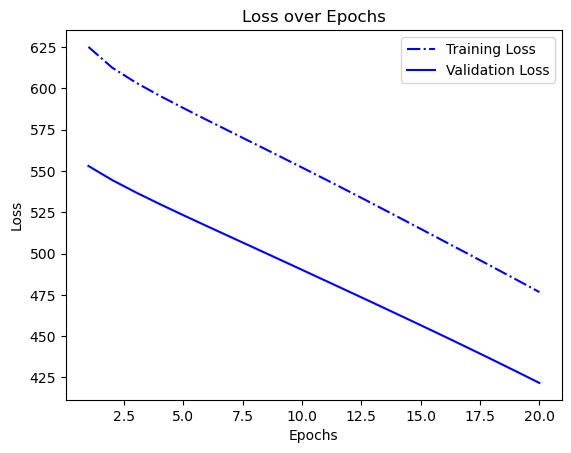

In [7]:
bostonhousing.plot_loss(history_dict)

In [9]:
results = bostonhousing.evaluate(model, test_data, test_labels)
print("Test set results:", results)

4/4 [==============================] - 0s 0s/step - loss: 397.1819 - mae: 18.0028
Test set results: [397.1819152832031, 18.00278091430664]
